Arquivo 'final_results.json' carregado com sucesso.
Gerando o gráfico com Matplotlib...


/tmp/ipykernel_48642/1198342153.py:67: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=labels, patch_artist=True, vert=True, meanline=True, showmeans=True)


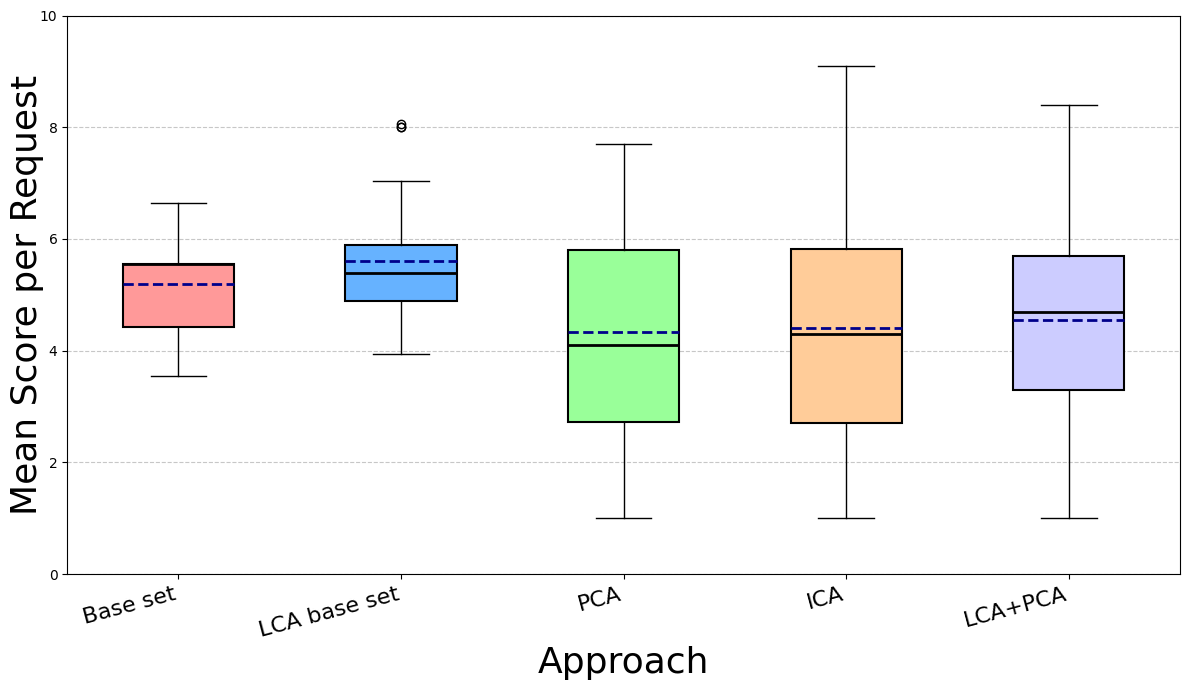

In [42]:
import matplotlib.pyplot as plt
import json
import numpy as np

# --- 1. Carregar o Arquivo JSON ---
# ***** MODIFICAÇÃO *****
# Usando o arquivo mais recente que você enviou, que contém os scores do SA
file_path = "final_results.json" 
try:
    with open(file_path, "r", encoding="utf-8") as f:
        data = json.load(f)
    print(f"Arquivo '{file_path}' carregado com sucesso.")
except Exception as e:
    print(f"Erro ao carregar o JSON: {e}")
    data = None

if data:
    # --- 2. Preparar as Listas de Dados ---
    base_completa_scores = []
    base_elite_lca_scores = []  # <--- ADICIONADO DE VOLTA
    pca_gerado_scores = []
    ica_gerado_scores = []
    lca_pca_gerado_scores = []
    
    # Iterar sobre cada pedido e coletar os scores
    for item in data:
        # Base (Completa)
        if item.get("pca") and item["pca"].get("base_mean_score") is not None:
            base_completa_scores.append(item["pca"]["base_mean_score"])
            
        # ***** MODIFICAÇÃO *****
        # Base (Elite LCA) - vindo da chave 'lca_pca'
        if item.get("lca_pca") and item["lca_pca"].get("base_mean_score") is not None:
            base_elite_lca_scores.append(item["lca_pca"]["base_mean_score"])
            
        # Gerados
        if item.get("pca") and item["pca"].get("mean_score") is not None:
            pca_gerado_scores.append(item["pca"]["mean_score"])
        if item.get("ica") and item["ica"].get("mean_score") is not None:
            ica_gerado_scores.append(item["ica"]["mean_score"])
        if item.get("lca_pca") and item["lca_pca"].get("mean_score") is not None:
            lca_pca_gerado_scores.append(item["lca_pca"]["mean_score"])

    # Agrupar os dados para o boxplot
    data_to_plot = [
        base_completa_scores, 
        base_elite_lca_scores,  # <--- ADICIONADO DE VOLTA
        pca_gerado_scores, 
        ica_gerado_scores, 
        lca_pca_gerado_scores
    ]
    
    # Definir os rótulos do eixo X
    labels = [
        "Base set", 
        "LCA base set",    # <--- ADICIONADO DE VOLTA
        "PCA", 
        "ICA", 
        "LCA+PCA"
    ]

    # --- 3. Criar o Gráfico com Matplotlib ---
    print("Gerando o gráfico com Matplotlib...")
    
    fig, ax = plt.subplots(figsize=(12, 7)) # Aumentei um pouco para 5 caixas
    
    bp = ax.boxplot(data_to_plot, labels=labels, patch_artist=True, vert=True, meanline=True, showmeans=True)

    # --- 4. Customizar o Gráfico ---
    ax.set_ylabel('Mean Score per Request', fontsize=26, labelpad=-3)
    ax.set_xlabel('Approach', fontsize=26)
    
    # MANTIDO: Limite do eixo Y de 0 a 10
    ax.set_ylim(0, 10) 
    ax.tick_params(axis='x', labelsize=16)
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)
    
    # Adicionado de volta para garantir que os 5 rótulos não se sobreponham
    plt.xticks(rotation=15, ha="right")
    
    # Adicionar cores às caixas (agora 5 cores)
    colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#CCCCFF']
    for i, box in enumerate(bp['boxes']):
        box.set_facecolor(colors[i % len(colors)])
        box.set_edgecolor('black')
        box.set_linewidth(1.5)

    # Melhorar a aparência das medianas e médias
    for median in bp['medians']:
        median.set_color('black')
        median.set_linewidth(2)
        
    for mean in bp['means']:
        mean.set_color('darkblue') 
        mean.set_linestyle('--')
        mean.set_linewidth(2)

    plt.tight_layout()

    # --- 5. Salvar a Imagem ---
    output_filename_pdf = "boxplot_scores.pdf"
    output_filename_png = "boxplot_scores.png"
    plt.savefig(output_filename_pdf)
    plt.savefig(output_filename_png)
    
    

else:
    print("Não foi possível gerar o gráfico pois os dados não foram carregados.")

Arquivo 'final_results.json' carregado com sucesso.
DataFrame com 89 pontos criado.
Gerando o gráfico de dispersão...


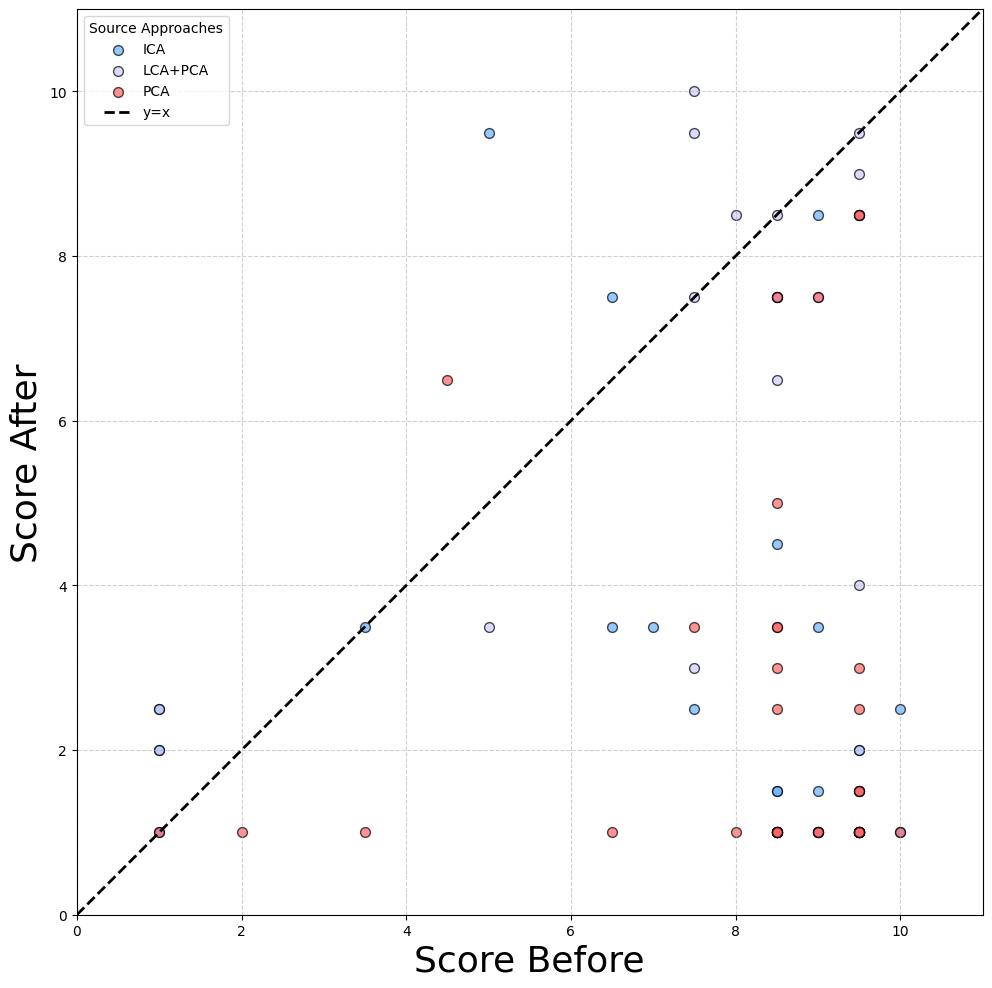

In [43]:
import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd

# --- 1. Carregar o Arquivo JSON ---
file_path = "final_results.json"
try:
    with open(file_path, "r", encoding="utf-8") as f:
        data = json.load(f)
    print(f"Arquivo '{file_path}' carregado com sucesso.")
except Exception as e:
    print(f"Erro ao carregar o JSON: {e}")
    data = None

if data:
    # --- 2. Preparar os Dados em um DataFrame ---
    plot_data = []
    for item in data:
        for method in ["pca", "ica", "lca_pca"]:
            if item.get(method):
                scores_list = item[method].get("scores", [])
                score_depois = item[method].get("simulated_annealing_prompt_score")
                if scores_list and score_depois is not None:
                    score_antes = max(scores_list)
                    plot_data.append({
                        "Método": method.upper(), # Cria 'PCA', 'ICA', 'LCA_PCA'
                        "Score Antes": score_antes,
                        "Score Depois": score_depois
                    })
    df = pd.DataFrame(plot_data)
    if df.empty:
        print("Erro: Nenhum dado válido encontrado.")
        data = None
    else:
        print(f"DataFrame com {len(df)} pontos criado.")

if data:
    # --- 3. Criar o Gráfico de Dispersão ---
    print("Gerando o gráfico de dispersão...")
    fig, ax = plt.subplots(figsize=(10, 10))

    # O dicionário de cores espera 'LCA+PCA'
    colors = {
        'PCA': '#FF6666', 
        'ICA': '#66B2FF', 
        'LCA+PCA': '#CCCCFF'
    }

    # ***** AQUI ESTÁ A CORREÇÃO *****
    # Renomeia 'LCA_PCA' no DataFrame para 'LCA+PCA'
    # para corresponder ao dicionário de cores e ficar correto na legenda.
    df['Método'] = df['Método'].replace('LCA_PCA', 'LCA+PCA')

    # Plotar os pontos para cada método
    for method, group in df.groupby('Método'):
        ax.scatter(
            group['Score Antes'], 
            group['Score Depois'], 
            label=method, 
            # Usar .get() para segurança, embora o 'replace' deva ter resolvido
            color=colors.get(method, '#888888'), 
            alpha=0.7, 
            edgecolor='black',
            s=50 
        )

    # --- 4. Customizar o Gráfico ---
    all_scores = pd.concat([df['Score Antes'], df['Score Depois']]).dropna()
    if all_scores.empty:
        min_val, max_val = 0, 10
    else:
        min_val = all_scores.min() - 1
        max_val = all_scores.max() + 1

    ax.plot(
        [min_val, max_val], 
        [min_val, max_val], 
        color='black', 
        linestyle='--', 
        linewidth=2, 
        label='y=x'
    )

    ax.set_aspect('equal', adjustable='box')
    if np.isfinite(min_val) and np.isfinite(max_val):
        ax.set_xlim(min_val, max_val)
        ax.set_ylim(min_val, max_val)
    else:
        ax.set_xlim(0, 10)
        ax.set_ylim(0, 10)

    ax.set_xlabel('Score Before', fontsize=26)
    ax.set_ylabel('Score After', fontsize=26)

    ax.legend(title="Source Approaches")
    ax.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()

    # --- 5. Salvar a Imagem ---
    output_filename_pdf = "sa_antes_depois_scatter.pdf"
    output_filename_png = "sa_antes_depois_scatter.png"
    plt.savefig(output_filename_pdf)
    plt.savefig(output_filename_png)

    

Arquivo 'final_results.json' carregado com sucesso.
Dados 'Antes' (N=89) e 'Depois' (N=89) coletados.
Gerando o gráfico boxplot...
Gráficos salvos como 'boxplot_sa_antes_depois.pdf' e 'boxplot_sa_antes_depois.png'.


/tmp/ipykernel_48642/606284537.py:57: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=labels, patch_artist=True, vert=True, meanline=True, showmeans=True)


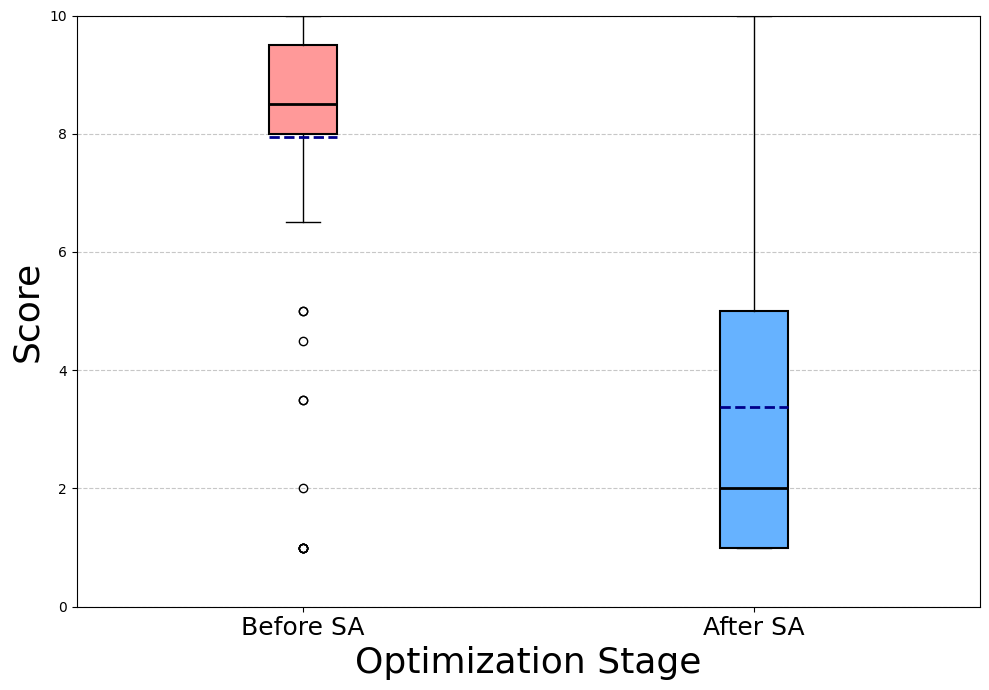

In [44]:
import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd

# --- 1. Carregar o Arquivo JSON ---
file_path = "final_results.json" 
try:
    with open(file_path, "r", encoding="utf-8") as f:
        data = json.load(f)
    print(f"Arquivo '{file_path}' carregado com sucesso.")
except Exception as e:
    print(f"Erro ao carregar o JSON: {e}")
    data = None

if data:
    # --- 2. Preparar as Duas Listas de Dados ---
    scores_antes_list = []
    scores_depois_list = []
    
    # Iterar sobre os 30 pedidos
    for item in data:
        # Iterar sobre os 3 métodos
        for method in ["pca", "ica", "lca_pca"]:
            if item.get(method):
                
                scores_list = item[method].get("scores", [])
                score_depois = item[method].get("simulated_annealing_prompt_score")
                
                # Se tivermos ambos os dados
                if scores_list and score_depois is not None:
                    score_antes = max(scores_list) # O "antes" é o melhor score da lista
                    scores_antes_list.append(score_antes)
                    scores_depois_list.append(score_depois)

    # Agrupar os dados para o boxplot
    data_to_plot = [
        scores_antes_list, 
        scores_depois_list
    ]
    
    # --- MODIFICAÇÃO 1: Rótulos simplificados ---
    # Definir os rótulos do eixo X de forma mais simples
    labels = [
        "Before SA", 
        "After SA"
    ]

    print(f"Dados 'Antes' (N={len(scores_antes_list)}) e 'Depois' (N={len(scores_depois_list)}) coletados.")

    # --- 3. Criar o Gráfico com Matplotlib ---
    print("Gerando o gráfico boxplot...")
    
    fig, ax = plt.subplots(figsize=(10, 7))
    
    # O parâmetro 'labels=labels' usará os rótulos simplificados
    bp = ax.boxplot(data_to_plot, labels=labels, patch_artist=True, vert=True, meanline=True, showmeans=True)

    # --- 4. Customizar o Gráfico ---
    ax.set_ylabel('Score', fontsize=26)
    ax.tick_params(axis='x', labelsize=18)
    # --- MODIFICAÇÃO 2: Adicionar título principal ao eixo X ---
    ax.set_xlabel('Optimization Stage', fontsize=26)
    
    # Definir limite do eixo Y.
    ax.set_ylim(0, 10) 
    
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)
    
    # Adicionar cores às caixas
    colors = ['#FF9999', '#66B2FF'] # Vermelho (Antes) e Azul (Depois)
    for i, box in enumerate(bp['boxes']):
        box.set_facecolor(colors[i])
        box.set_edgecolor('black')
        box.set_linewidth(1.5)

    # Melhorar a aparência das medianas e médias
    for median in bp['medians']:
        median.set_color('black')
        median.set_linewidth(2)
        
    for mean in bp['means']:
        mean.set_color('darkblue') 
        mean.set_linestyle('--')
        mean.set_linewidth(2)

    plt.tight_layout()

    # --- 5. Salvar a Imagem ---
    output_filename_pdf = "boxplot_sa_antes_depois.pdf"
    output_filename_png = "boxplot_sa_antes_depois.png"
    plt.savefig(output_filename_pdf)
    plt.savefig(output_filename_png)
    
    print(f"Gráficos salvos como '{output_filename_pdf}' e '{output_filename_png}'.")

else:
    print("Não foi possível gerar o gráfico pois os dados não foram carregados.")

Arquivo 'final_results.json' carregado com sucesso.
DataFrame com 89 pontos de dados (PPL/Score) criado.
    Método  Perplexidade  Score
0      PCA   2033.968262    1.0
1      ICA    478.389771    1.5
2  LCA_PCA    942.758057    1.0
3      PCA    647.674744    3.5
4      ICA   1374.194702    3.5
Gerando o gráfico de dispersão (Perplexidade vs. Score)...


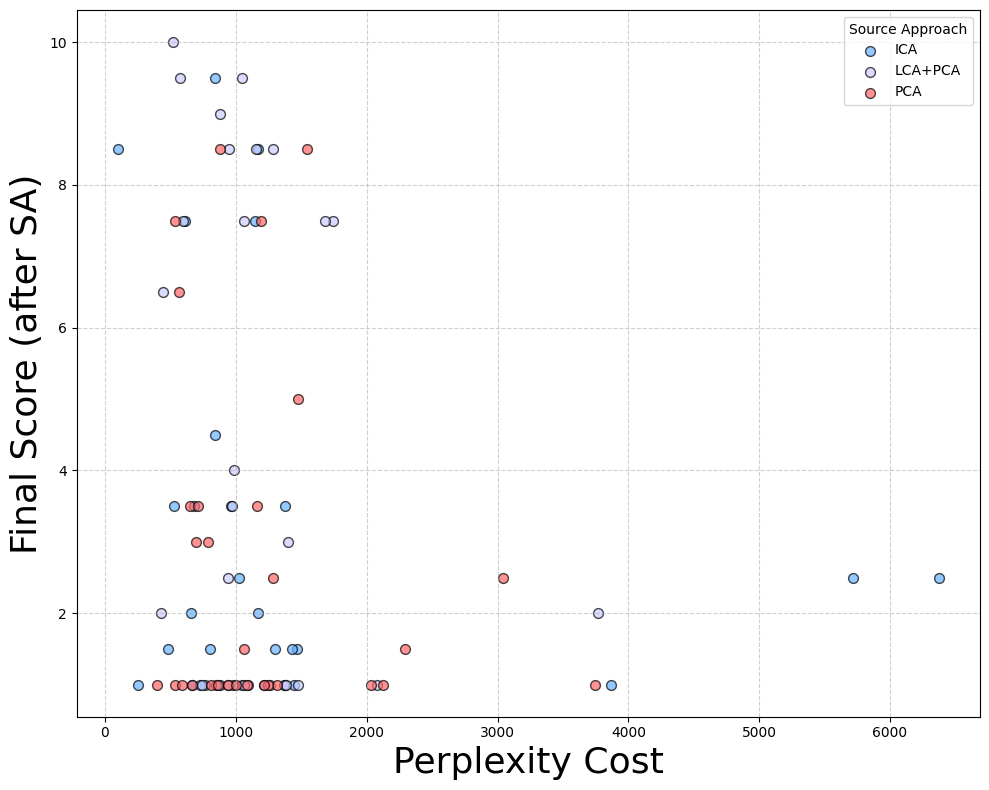

In [45]:
import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd

# --- 1. Carregar o Arquivo JSON ---
file_path = "final_results.json"
try:
    with open(file_path, "r", encoding="utf-8") as f:
        data = json.load(f)
    print(f"Arquivo '{file_path}' carregado com sucesso.")
except Exception as e:
    print(f"Erro ao carregar o JSON: {e}")
    data = None

if data:
    # --- 2. Preparar os Dados em um DataFrame ---
    plot_data = []
    
    # Iterar sobre os 30 pedidos
    for item in data:
        # Iterar sobre os 3 métodos
        for method in ["pca", "ica", "lca_pca"]:
            if item.get(method):
                
                # Extrair os dois valores que queremos correlacionar
                ppl_cost = item[method].get("simulated_annealing_ppl_cost")
                score = item[method].get("simulated_annealing_prompt_score")
                
                # Só adicionar se tivermos os dois dados
                if ppl_cost is not None and score is not None:
                    plot_data.append({
                        "Método": method.upper(), # 'PCA', 'ICA', 'LCA_PCA'
                        "Perplexidade": ppl_cost,
                        "Score": score
                    })

    # Criar um DataFrame do Pandas
    df = pd.DataFrame(plot_data)
    
    if df.empty:
        print("Erro: Nenhum dado válido (par PPL e Score) foi encontrado no JSON.")
        data = None 
    else:
        print(f"DataFrame com {len(df)} pontos de dados (PPL/Score) criado.")
        print(df.head())

if data:
    # --- 3. Criar o Gráfico de Dispersão ---
    print("Gerando o gráfico de dispersão (Perplexidade vs. Score)...")
    
    fig, ax = plt.subplots(figsize=(10, 8))
    
    colors = {
        'PCA': '#FF6666', 
        'ICA': '#66B2FF', 
        'LCA+PCA': '#CCCCFF'
    }
    
    # Renomear 'LCA_PCA' para 'LCA+PCA' no DataFrame
    df['Método'] = df['Método'].replace('LCA_PCA', 'LCA+PCA')

    # Plotar os pontos para cada método
    for method, group in df.groupby('Método'):
        ax.scatter(
            group['Perplexidade'], 
            group['Score'], 
            label=f"{method}", 
            color=colors.get(method, '#888888'),
            alpha=0.7, 
            edgecolor='black',
            s=50 
        )

    # --- 4. Customizar o Gráfico ---
    ax.set_xlabel('Perplexity Cost', fontsize=26)
    ax.set_ylabel('Final Score (after SA)', fontsize=26)
    
    ax.legend(title="Source Approach")
    ax.grid(True, linestyle='--', alpha=0.6)
    
    plt.tight_layout()

    # --- 5. Salvar a Imagem ---
    output_filename_pdf = "ppl_vs_score_scatter.pdf"
    output_filename_png = "ppl_vs_score_scatter.png"
    plt.savefig(output_filename_pdf)
    plt.savefig(output_filename_png)
    
    

Arquivo 'simmulated_annealing_results_with_score.json' carregado com sucesso.
DataFrame com 90 valores de Desvio Padrão criado.
    Método  Desvio Padrão
0      PCA       2.908608
1      ICA       3.307567
2  LCA+PCA       3.919184
3      PCA       2.428992
4      ICA       3.120897
Gerando o histograma facetado dos desvios padrão...


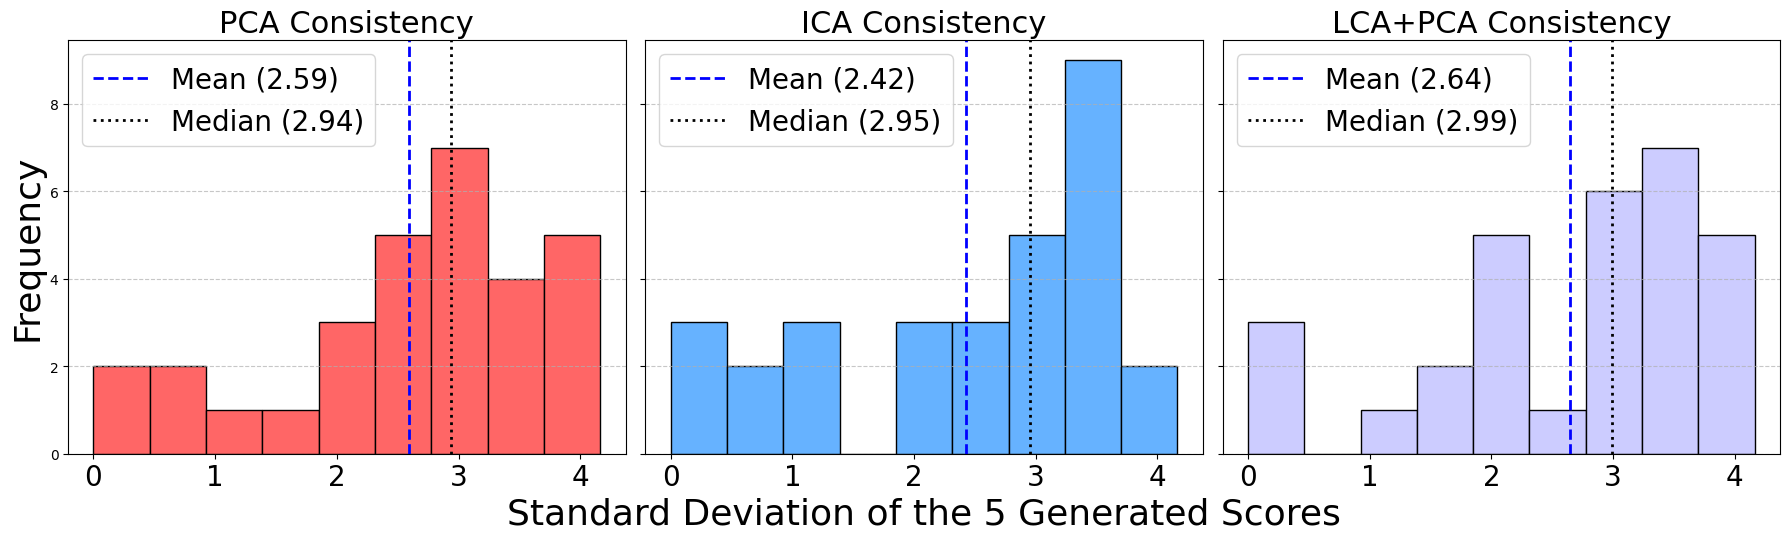

In [47]:
import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd

# --- 1. Carregar o Arquivo JSON ---
file_path = "simmulated_annealing_results_with_score.json"
try:
    with open(file_path, "r", encoding="utf-8") as f:
        data = json.load(f)
    print(f"Arquivo '{file_path}' carregado com sucesso.")
except Exception as e:
    print(f"Erro ao carregar o JSON: {e}")
    data = None

if data:
    # --- 2. Preparar os Dados ---
    std_dev_data = []
    
    # Iterar sobre os 30 pedidos
    for item in data:
        # Iterar sobre os 3 métodos
        for method in ["pca", "ica", "lca_pca"]:
            if item.get(method):
                scores_list = item[method].get("scores", [])
                
                # Só calcular se tivermos pelo menos 2 scores para ter um desvio
                if len(scores_list) > 1:
                    std_dev = np.std(scores_list)
                    std_dev_data.append({
                        "Método": method.upper().replace('LCA_PCA', 'LCA+PCA'),
                        "Desvio Padrão": std_dev
                    })

    # Criar um DataFrame do Pandas
    df_std = pd.DataFrame(std_dev_data)
    
    if df_std.empty:
        print("Erro: Nenhum dado de desvio padrão pôde ser calculado.")
        data = None 
    else:
        print(f"DataFrame com {len(df_std)} valores de Desvio Padrão criado.")
        print(df_std.head())

if data:
    # --- 3. Criar o Histograma Facetado ---
    print("Gerando o histograma facetado dos desvios padrão...")
    
    # Criar 3 subplots (um para cada método)
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    
    colors = {
        'PCA': '#FF6666', 
        'ICA': '#66B2FF', 
        'LCA+PCA': '#CCCCFF'
    }
    
    # Encontrar o bin máximo global para eixos X consistentes
    max_std = df_std['Desvio Padrão'].max()
    bins = np.linspace(0, max_std, 10)

    for ax, method in zip(axes, ['PCA', 'ICA', 'LCA+PCA']):
        # Filtrar o DataFrame para este método
        method_data = df_std[df_std['Método'] == method]['Desvio Padrão']
        
        if method_data.empty:
            ax.set_title(f"{method}\n(Sem Dados)", color='grey')
            continue
            
        ax.hist(method_data, bins=bins, color=colors[method], edgecolor='black')
        
        # Adicionar média e mediana do desvio
        mean_std = method_data.mean()
        median_std = method_data.median()
        
        ax.axvline(mean_std, color='blue', linestyle='--', linewidth=2, label=f'Mean ({mean_std:.2f})')
        ax.axvline(median_std, color='black', linestyle=':', linewidth=2, label=f'Median ({median_std:.2f})')
        ax.tick_params(axis='x', labelsize=20)
        ax.set_title(f"{method} Consistency", fontsize=22)
        
        ax.legend(fontsize=20)
        ax.grid(axis='y', linestyle='--', alpha=0.7)

    axes[0].set_ylabel('Frequency', fontsize=26)
    axes[1].set_xlabel("Standard Deviation of the 5 Generated Scores", fontsize=26)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # --- 5. Salvar a Imagem ---
    output_filename_pdf = "std_dev_histogram.pdf"
    output_filename_png = "std_dev_histogram.png"
    plt.savefig(output_filename_pdf)
    plt.savefig(output_filename_png)
    
